In [1]:
import numpy as np

import re
import collections

from tqdm.notebook import tqdm

https://adventofcode.com/2020

# Day 24

In [2]:
with open('input24') as f:
    input24 = f.read().strip()

## Part 1

In [3]:
def parse_tile_str(s):
    flip_list = []
    for line in s.strip().split('\n'):
        directions = re.findall('e|se|sw|w|nw|ne', line)
        flip_list.append(directions)
    return flip_list

lst = parse_tile_str('nwwswee')
assert len(lst) == 1
assert np.all(lst[0] == ['nw', 'w', 'sw', 'e', 'e'])

Indexing convention: each row has the same "y" coordinate, which has the same x coordinate is the one immediately to the nw or se - "axial" coordinates.

In [4]:
movement_encoding = {'nw': (0, 1), 'ne': (1, 1), 'e':(1, 0), 'se': (0, -1), 'sw': (-1, -1), 'w': (-1, 0)}
def find_tile(move_list):
    i = j = 0
    for mstr in move_list:
        dx, dy = movement_encoding[mstr]
        i += dx
        j += dy
    return i, j
assert find_tile(parse_tile_str('nwwswee')[0]) == (0, 0)
assert find_tile(parse_tile_str('esew')[0]) == (0, -1)

In [5]:
def do_flips(inpt):
    if isinstance(inpt, str):
        inpt = parse_tile_str(inpt)

    tiles_black = collections.defaultdict(lambda:False)

    for line in inpt:
        x, y = find_tile(line)
        tiles_black[(x, y)] = not tiles_black[(x, y)]

    return tiles_black

test_input = """sesenwnenenewseeswwswswwnenewsewsw
neeenesenwnwwswnenewnwwsewnenwseswesw
seswneswswsenwwnwse
nwnwneseeswswnenewneswwnewseswneseene
swweswneswnenwsewnwneneseenw
eesenwseswswnenwswnwnwsewwnwsene
sewnenenenesenwsewnenwwwse
wenwwweseeeweswwwnwwe
wsweesenenewnwwnwsenewsenwwsesesenwne
neeswseenwwswnwswswnw
nenwswwsewswnenenewsenwsenwnesesenew
enewnwewneswsewnwswenweswnenwsenwsw
sweneswneswneneenwnewenewwneswswnese
swwesenesewenwneswnwwneseswwne
enesenwswwswneneswsenwnewswseenwsese
wnwnesenesenenwwnenwsewesewsesesew
nenewswnwewswnenesenwnesewesw
eneswnwswnwsenenwnwnwwseeswneewsenese
neswnwewnwnwseenwseesewsenwsweewe
wseweeenwnesenwwwswnew"""

assert sum(do_flips(test_input).values()) == 10

sum(do_flips(input24).values())

293

## Part 2 

In [6]:
adjacency_deltas = tuple(movement_encoding.values())

def compute_daily_flips(tiles_black):
    xs = []
    ys = []
    for x, y in tiles_black.keys():
        xs.append(x)
        ys.append(y)
    xmi = min(xs)
    xmx = max(xs)
    ymi = min(ys)
    ymx = max(ys)
    
    to_flip = []
    for x in range(xmi-1, xmx+2):
        for y in range(ymi-1, ymx+2):
            nw_neighbors = nb_neighbors = 0
            for dx, dy in adjacency_deltas:
                t = tiles_black[x+dx, y+dy]
                if t:
                    nb_neighbors += 1
                else:
                    nw_neighbors += 1
                    
            if tiles_black[x, y]:
                if nb_neighbors == 0 or nb_neighbors > 2:
                    to_flip.append((x, y))
            else: # white
                if nb_neighbors == 2:
                    to_flip.append((x, y))
                    
    new_black = tiles_black.copy()
    for x,y in to_flip:
        new_black[x, y] = not new_black[x, y]
        
    return new_black

assert sum(compute_daily_flips(do_flips(test_input)).values()) == 15

In [7]:
tiles_black = do_flips(test_input)
for i in range(100):
    tiles_black = compute_daily_flips(tiles_black)
    if i < 10:
        print(i+1, sum(tiles_black.values()))
assert sum(tiles_black.values()) == 2208

1 15
2 12
3 25
4 14
5 23
6 28
7 41
8 37
9 49
10 37


In [8]:
tiles_black = do_flips(input24)
for i in tqdm(range(100)):
    tiles_black = compute_daily_flips(tiles_black)
sum(tiles_black.values())

3967

For funsies, lets plot up what the tiling looks like.  First have to work out how the matplotlib polygon scheme maps onto our convention

In [9]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

(-4, 1)

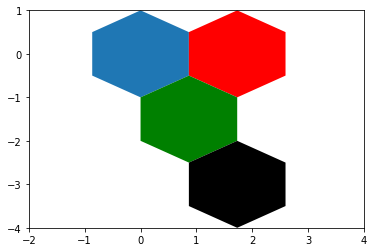

In [10]:
ax = plt.gca()

r = 1
w = 3**0.5 * r
h = 2* r 

def idx_to_xy(i, j, r=1):
    w = 3**0.5 * r
    h = 2 * r 

    y = 3/4 * j * h
    x = (i - j/2) * w
    return x, y

ax.add_patch(mpatches.RegularPolygon(idx_to_xy(0, 0), 6, r))
ax.add_patch(mpatches.RegularPolygon(idx_to_xy(1, 0), 6, r, facecolor='r'))
ax.add_patch(mpatches.RegularPolygon(idx_to_xy(0, -1), 6, r, facecolor='g'))
ax.add_patch(mpatches.RegularPolygon(idx_to_xy(0, -2), 6, r, facecolor='k'))

plt.xlim(-2, 4)
plt.ylim(-4, 1)

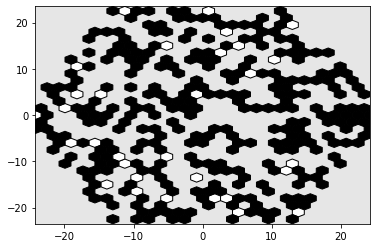

In [12]:


def make_polygon_grid(black_tiles, r=1):
    iss = []
    js = []
    for (i,j), black in black_tiles.items():
        if black:
            iss.append(i)
            js.append(j)
    imi = min(iss)
    imx = max(iss)
    jmi = min(js)
    jmx = max(js)

    ax = plt.gca(facecolor=(.9,.9,.9))

    for (i,j), black in black_tiles.items():
        ax.add_patch(mpatches.RegularPolygon(idx_to_xy(i, j, r=r), 6, r, edgecolor='k', facecolor='k' if black else 'w'))
        
    xmi, ymi = idx_to_xy(imi, jmi, r=r)
    xmx, ymx = idx_to_xy(imx, jmx, r=r)
    plt.xlim((xmi-1)*3**0.5, (xmx+1)*3**0.5)
    plt.ylim(ymi-1, ymx+1)
    
    return ax

make_polygon_grid(do_flips(input24));

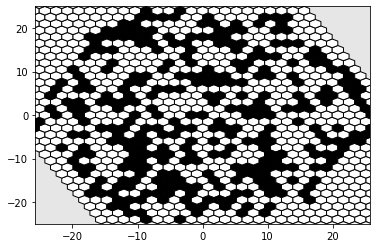

In [13]:
make_polygon_grid(compute_daily_flips(do_flips(input24)));

# Day 25

In [14]:
with open('input25') as f:
    input25 = f.read().strip()

## Part 1

## Part 2 